In [1]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import pandas as pd

# Load your data
data = pd.read_csv('analysisdataset.csv')

# Create a unique Speech_ID using annotation_id
data['Speech_ID'] = data['annotation_id']

# Replace spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Split combined themes into individual themes
data['Themes'] = data['Theme_Combined'].str.split()

# Explode the list of themes into separate rows
data_expanded = data.explode('Themes').reset_index(drop=True)

# Filter data for GDP per capita model (exclude rows with missing GDP_capita)
data_gdp = data_expanded.dropna(subset=['GDP_capita'])

# Fit the mixed-effects model
model_gdp = smf.mixedlm("GDP_capita ~ Themes", data=data_gdp, groups=data_gdp["Speech_ID"])
result_gdp = model_gdp.fit()
print(result_gdp.summary())


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       GDP_capita
No. Observations:         506           Method:                   REML      
No. Groups:               477           Scale:                    33.6041   
Min. group size:          1             Log-Likelihood:           -5688.1177
Max. group size:          2             Converged:                Yes       
Mean group size:          1.1                                               
----------------------------------------------------------------------------
                    Coef.        Std.Err.     z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------
Intercept            16112.258     2263.044  7.120 0.000 11676.773 20547.743
Themes[T.NG]          3217.251     3101.493  1.037 0.300 -2861.564  9296.066
Themes[T.S_dom]          0.001        4.356  0.000 1.000    -8.536     8.538
Themes[T.S_int]    

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
    AG     NG   6771.2818 0.9339 -10511.3268 24053.8903  False
    AG  S_dom   7835.1534 0.9443  -12834.357 28504.6638  False
    AG  S_int  26381.8665  0.006   4637.9084 48125.8247   True
    AG  S_reg   7842.6543 0.9925 -21570.5747 37255.8832  False
    AG  W_dom   4835.9049 0.9976 -16908.0532 26579.8631  False
    AG  W_int    509.5493    1.0 -20159.9611 21179.0597  False
    AG  W_reg  -1171.2469    1.0 -29411.1742 27068.6805  False
    NG  S_dom   1063.8716    1.0 -13538.9647 15666.7078  False
    NG  S_int  19610.5848 0.0056   3522.8912 35698.2783   True
    NG  S_reg   1071.3725    1.0 -24446.3116 26589.0566  False
    NG  W_dom  -1935.3768    1.0 -18023.0704 14152.3167  False
    NG  W_int  -6261.7325 0.8968 -20864.5687  8341.1038  False
    NG  W_reg  -7942.5286 0.9742  -32098.432 16213.3747

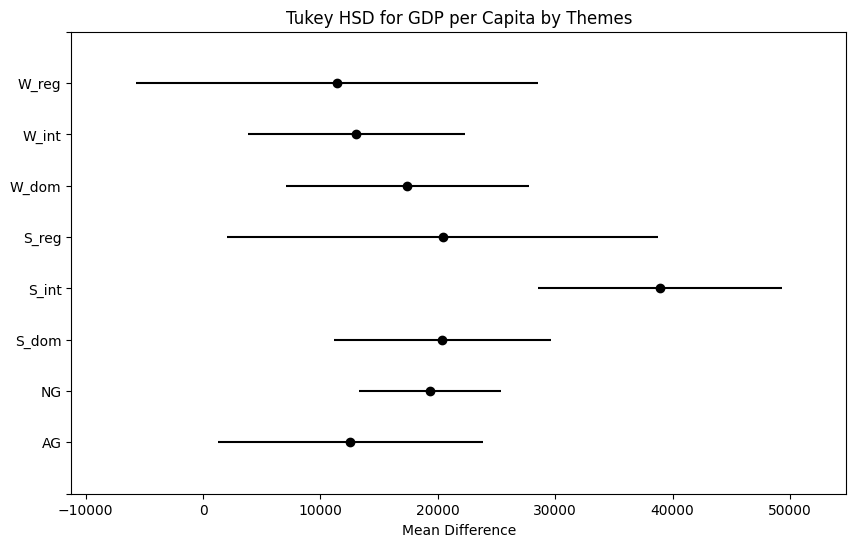

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Perform Tukey's HSD test
mc = multi.MultiComparison(data_gdp['GDP_capita'], data_gdp['Themes'])
tukey_result = mc.tukeyhsd()
print(tukey_result.summary())

# Plot the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD for GDP per Capita by Themes')
plt.xlabel('Mean Difference')
plt.show()


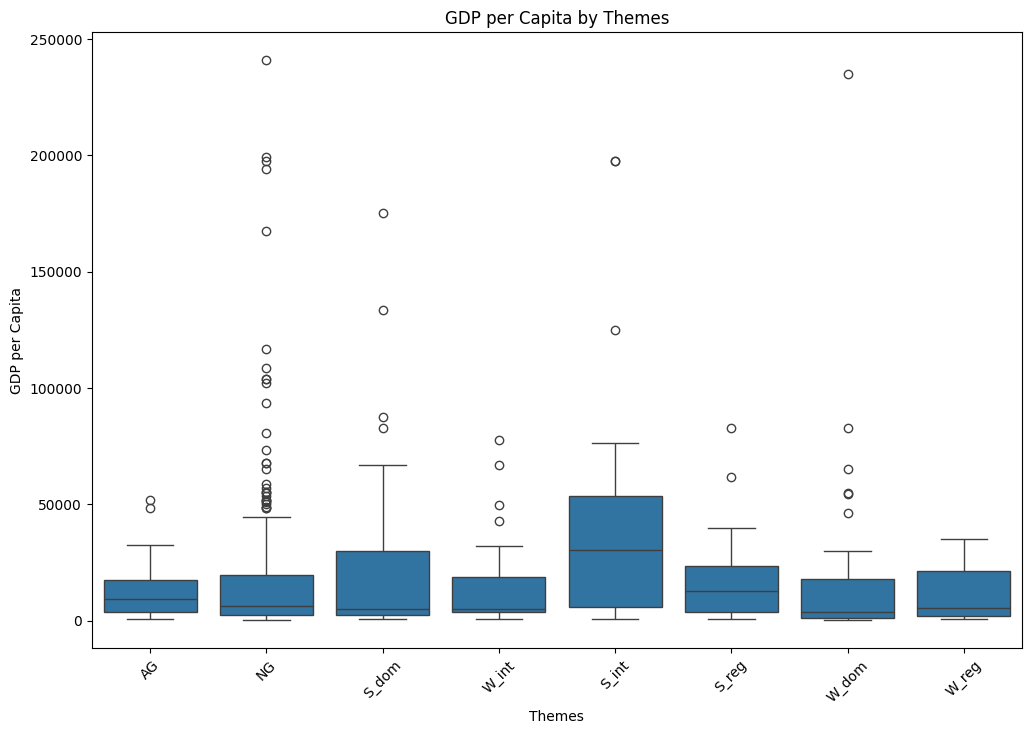

In [8]:
# Box plot of GDP per capita by themes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Themes', y='GDP_capita', data=data_gdp)
plt.title('GDP per Capita by Themes')
plt.xlabel('Themes')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)
plt.show()


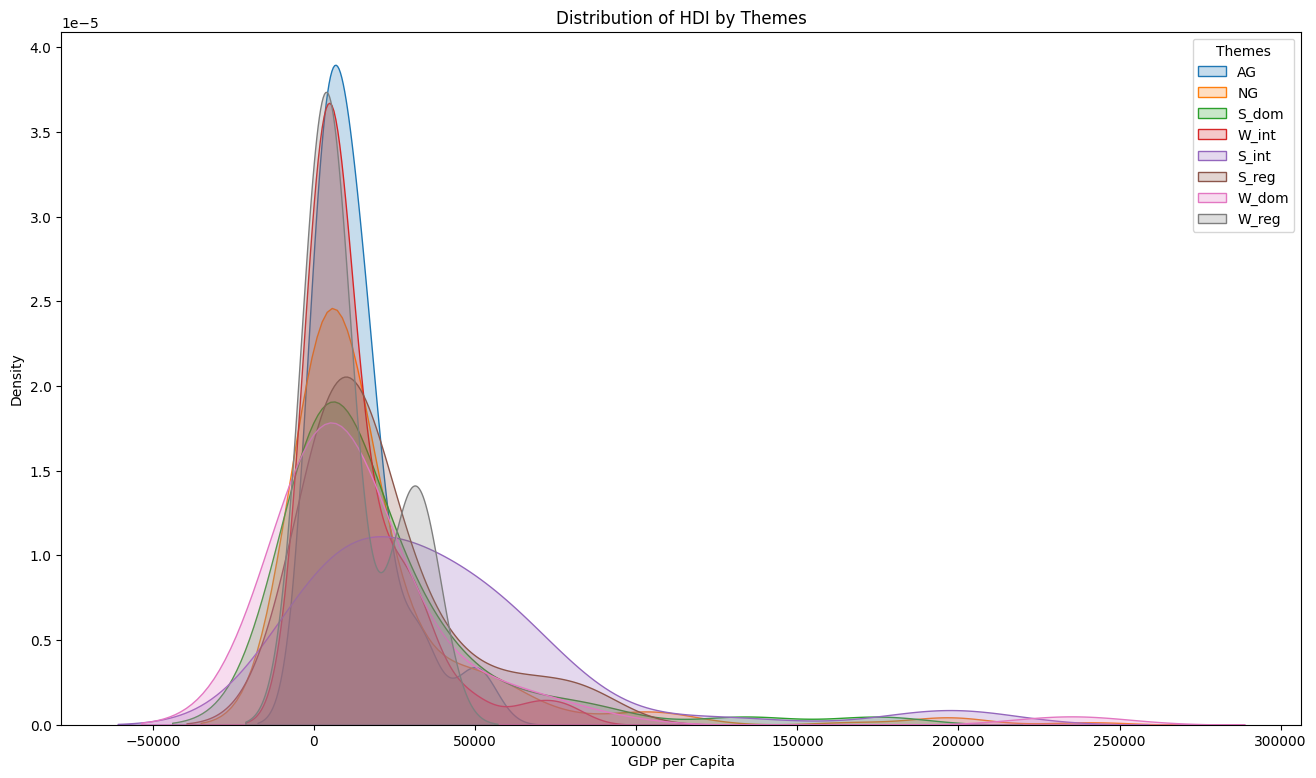

In [9]:


# Set the figure size
plt.figure(figsize=(16, 9))

# Generate density plot for each theme
themes = data_gdp['Themes'].unique()
for theme in themes:
    subset = data_gdp[data_gdp['Themes'] == theme]
    sns.kdeplot(subset['GDP_capita'], label=theme, fill=True)

# Customize the plot
plt.title('Distribution of HDI by Themes')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.legend(title='Themes')
plt.show()


<Figure size 1200x800 with 0 Axes>

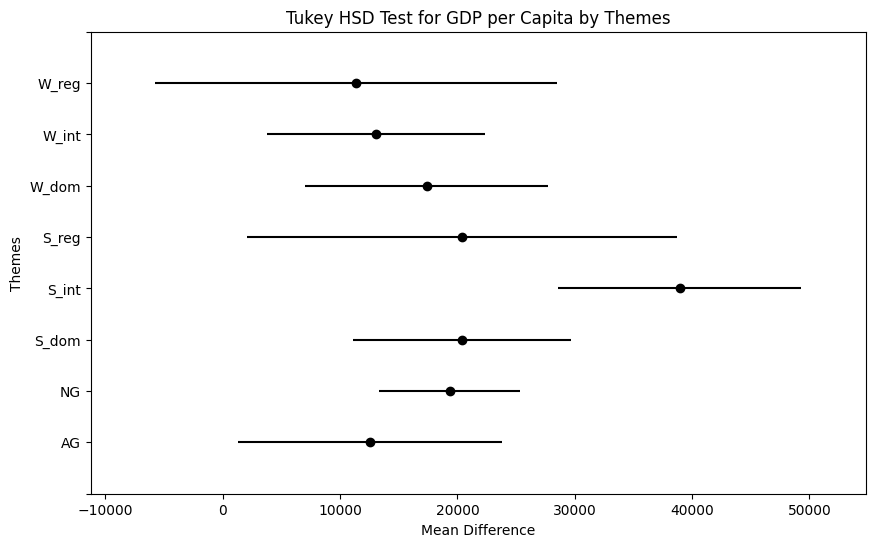

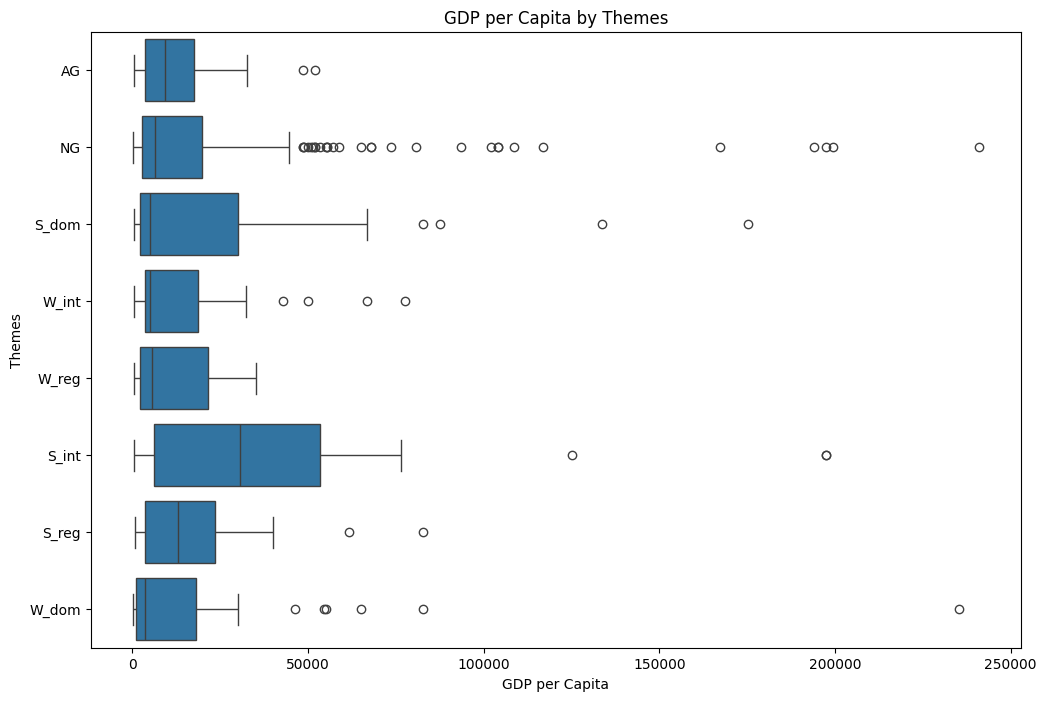

In [16]:
# Plot the results of Tukey's HSD test
plt.figure(figsize=(12, 8))
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for GDP per Capita by Themes')
plt.xlabel('Mean Difference')
plt.ylabel('Themes')
plt.show()

# Optionally, create a boxplot to visualize the distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='GDP_capita', y='Themes', data=data_gdp)
plt.title('GDP per Capita by Themes')
plt.xlabel('GDP per Capita')
plt.ylabel('Themes')
plt.show()


<Figure size 1200x800 with 0 Axes>

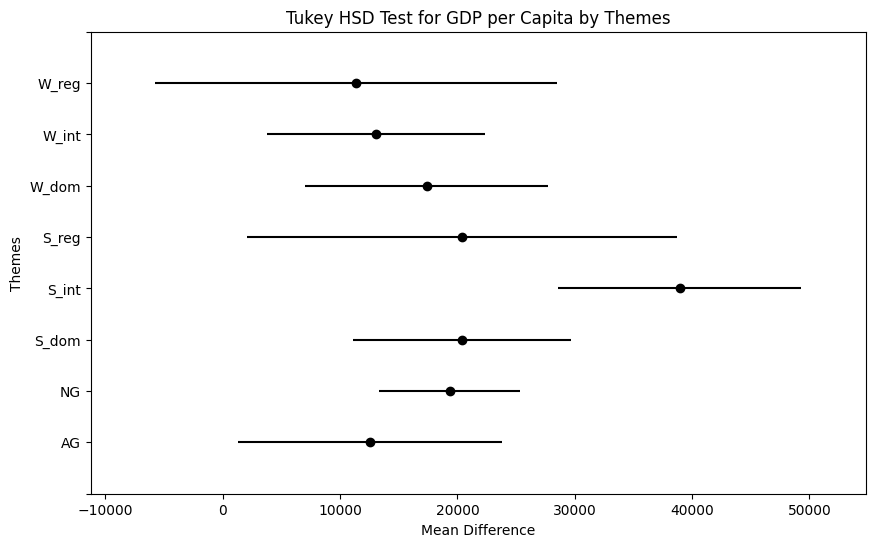

Significant pairwise comparisons:
['AG', 'NG', 6771.2818, 0.9339, -10511.3268, 24053.8903, False]
['AG', 'S_dom', 7835.1534, 0.9443, -12834.357, 28504.6638, False]
['AG', 'S_reg', 7842.6543, 0.9925, -21570.5747, 37255.8832, False]
['AG', 'W_dom', 4835.9049, 0.9976, -16908.0532, 26579.8631, False]
['AG', 'W_int', 509.5493, 1.0, -20159.9611, 21179.0597, False]
['AG', 'W_reg', -1171.2469, 1.0, -29411.1742, 27068.6805, False]
['NG', 'S_dom', 1063.8716, 1.0, -13538.9647, 15666.7078, False]
['NG', 'S_reg', 1071.3725, 1.0, -24446.3116, 26589.0566, False]
['NG', 'W_dom', -1935.3768, 1.0, -18023.0704, 14152.3167, False]
['NG', 'W_int', -6261.7325, 0.8968, -20864.5687, 8341.1038, False]
['NG', 'W_reg', -7942.5286, 0.9742, -32098.432, 16213.3747, False]
['S_dom', 'S_int', 18546.7132, 0.0813, -1134.5974, 38228.0237, False]
['S_dom', 'S_reg', 7.5009, 1.0, -27915.47, 27930.4718, False]
['S_dom', 'W_dom', -2999.2484, 0.9998, -22680.559, 16682.0621, False]
['S_dom', 'W_int', -7325.604, 0.93, -25812.97

In [17]:
# Plot the results of Tukey's HSD test
plt.figure(figsize=(12, 8))
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for GDP per Capita by Themes')
plt.xlabel('Mean Difference')
plt.ylabel('Themes')
plt.show()

# Highlight significant results in the summary
significant_results = tukey_result.summary().data[1:]
significant_pairs = [result for result in significant_results if result[-1] < 0.05]
print("Significant pairwise comparisons:")
for pair in significant_pairs:
    print(pair)